In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sdes.sdes import OrnsteinUhlenbeck, BrownianMotion
from sdes.tools import plot_simulations

Some functions that are used to create plots are written here:

In [2]:
def struct_array_to_array(A):
    return np.array([A[name][0] for name in A.dtype.names])

def univariate_simulation_test(sde, nums, dist_kwargs):
    fig, ax = plt.subplots()
    for num in nums:
        dist_kwargs['num'] = num
        rvs = sde.simulate(size=1, **dist_kwargs)
        t_s = [dist_kwargs['t_start']] + [float(t) for t in rvs.dtype.names]
        X_ts = struct_array_to_array(rvs); X_ts = np.concatenate([np.array([dist_kwargs['x_start']]), X_ts])
        ax.plot(t_s, X_ts, label=f'n_points = {num}')
    # Configure axis settings
    ax.legend(); ax.set_xlabel('t'); ax.set_ylabel('X_t'); ax.grid(visible=True)
    return fig, ax

# Linear SDEs

`LinearSDE` is a subclass of `SDE`. This is an important subclass, because Linear SDEs are Gaussian processes with mean function and covariance kernel that satisfy certain ODEs. In some cases, these ODEs can be solved, leading to a tractable expression for the transition density.

Having access to the transition density means that one can simulate exactly from the transition density and evaluate the transition density along with its gradient.

We work with the special case of the OU process to test the implementation:

$$dX_t = -\rho X_t + \phi dW_t$$

$\theta = (\rho, \phi) = (0.2, 0.1)$ 

In [3]:
bm_sde = BrownianMotion(m=1., s=0.1)

In [5]:
exact_simulate_kwargs = {'size': 10,
                   'x_0': 0.,
                  'x_start': 0.,
                  't_start': 0.,
                  't_end': 1.,
                  'num': 1000}

simulate_kwargs = {'size': 10,
                  'x_start': 0.,
                  't_start': 0.,
                  't_end': 1.,
                  'num': 1000,
                  'milstein': False}

exact_sims = bm_sde.exact_simulate(**exact_simulate_kwargs)
simulate_kwargs['milstein'] = False
em_sims = bm_sde.simulate(**simulate_kwargs)
simulate_kwargs['milstein'] = True
milstein_sims = bm_sde.simulate(**simulate_kwargs)

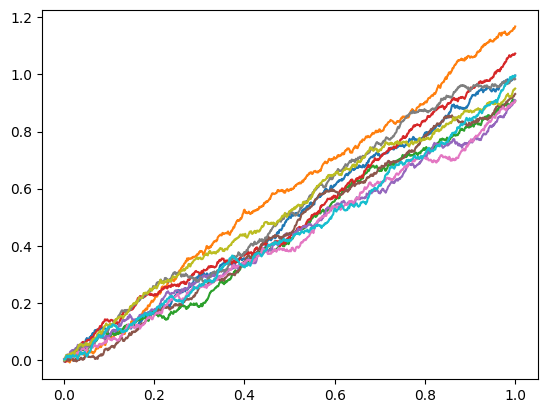

In [6]:
plot_simulations(exact_sims);

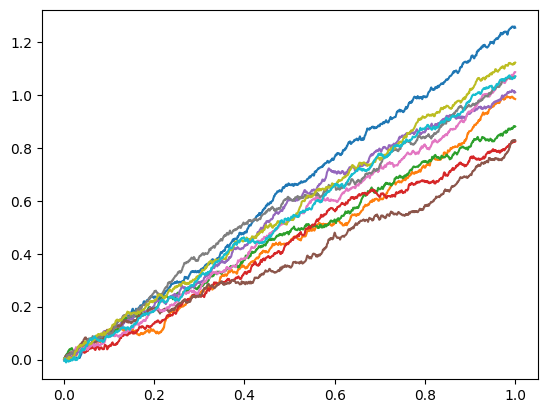

In [7]:
plot_simulations(em_sims);

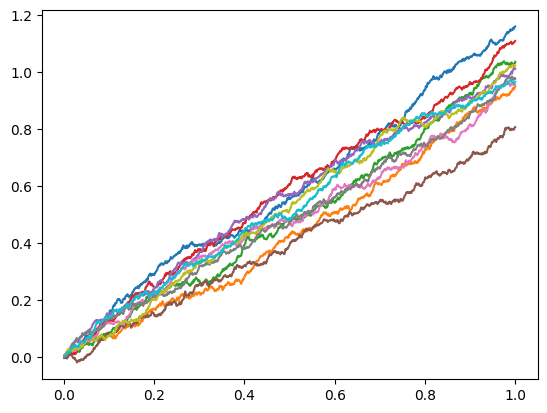

In [8]:
plot_simulations(milstein_sims);

## OU Tests

In [3]:
ou_sde = OrnsteinUhlenbeck(rho=0.2, phi=0.1)

We test the 3 different approaches to simulation: 
- Euler-Maruyama
- Milstein
- Exact

In [4]:
exact_simulate_kwargs = {'size': 10,
                   'x_0': 0.,
                  'x_start': 0.,
                  't_start': 0.,
                  't_end': 1.,
                  'num': 1000}

simulate_kwargs = {'size': 10,
                  'x_start': 0.,
                  't_start': 0.,
                  't_end': 1.,
                  'num': 1000,
                  'milstein': False}

exact_sims = ou_sde.exact_simulate(**exact_simulate_kwargs)
em_sims = ou_sde.simulate(**simulate_kwargs)
simulate_kwargs['milstein'] = True
milstein_sims = ou_sde.simulate(**simulate_kwargs)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

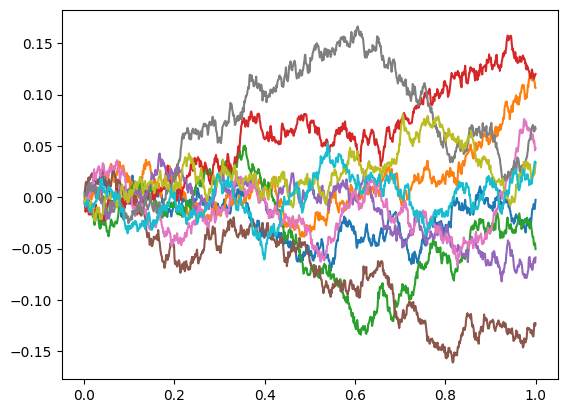

In [5]:
plot_simulations(exact_sims)

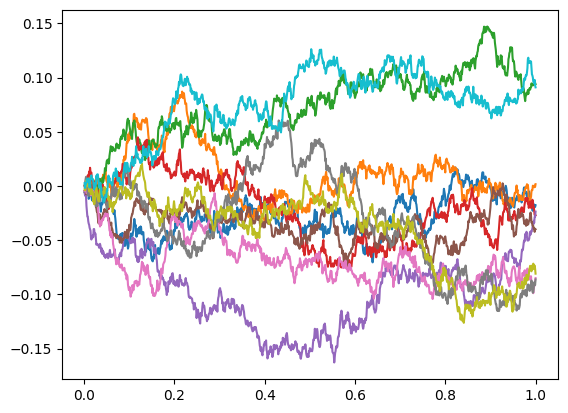

In [6]:
plot_simulations(em_sims);

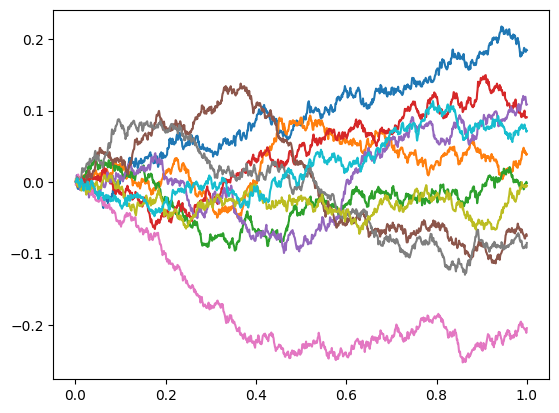

In [7]:
plot_simulations(milstein_sims);